https://github.com/Thinkful-Ed/data-201-assignment-solutions/blob/master/model_prep_outliers/solution.ipynb

```
# Z score

from scipy.stats import zscore

z_scores = zscore(youtube_df["Video views"])
for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))
```

```
# Tukey Method

# NumPy's `percentile()` method returns the 
# values of the given percentiles. In this case,
# give `75` and `25` as parameters, which corresponds 
# to the third and the first quartiles.
q75, q25 = np.percentile(youtube_df["Video views"], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((youtube_df["Video views"] > max_val) 
                      | (youtube_df["Video views"] < min_val))[0]))
    ))
```

```
# Winsorization (Percentile Method)

from scipy.stats.mstats import winsorize

# Apply one-way winsorization to the highest end
# of the value distribution. Because you have a lot of extreme
# values, set the values of the outliers to the 
# value of the ninetieth percentile. 
winsorized_views = winsorize(youtube_df["Video views"], (0, 0.10))

winsorized_views
```

```
# Take the log of the video views and calculate
# the quartiles accordingly.
q75, q25 = np.percentile(np.log(youtube_df["Video views"]), [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((np.log(youtube_df["Video views"]) > max_val) 
                      | (np.log(youtube_df["Video views"]) < min_val))[0]))
    ))
```

```
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.hist(youtube_df["Video views"])
plt.title("Histogram of video views")

plt.subplot(1,2,2)
plt.hist(np.log(youtube_df["Video views"]))
plt.title("Histogram of log transformed video views")
plt.show()
```

```
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(youtube_df["Video views"])
plt.title("Box plot of video views")

plt.subplot(1,2,2)
plt.boxplot(np.log(youtube_df["Video views"]))
plt.title("Box plot of log transformed video views")
plt.show()
```

In [ ]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [ ]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

educ_df = pd.read_sql_query('select * from useducation',con=engine)

# No need for an open connection, 
# because you're only doing a single query
engine.dispose()

In [ ]:
educ2_df = educ_df.copy()

In [ ]:
# Use interpolation for missing values
# loc is like "find this row and then this column"

columns = educ2_df.columns[2:]

for column in columns:
    educ2_df.loc[:, column] = educ2_df.loc[:, column].interpolate()

In [ ]:
# No missing values
print("The number of missing values in TOTAL_REVENUE is: {}".format(educ2_df['TOTAL_REVENUE'].isnull().sum()))
print("The number of missing values in TOTAL_EXPENDITURE is: {}".format(educ2_df['TOTAL_EXPENDITURE'].isnull().sum()))

The number of missing values in TOTAL_REVENUE is: 0
The number of missing values in TOTAL_EXPENDITURE is: 0


1. Consider the two variables `TOTAL_REVENUE` and `TOTAL_EXPENDITURE`. Do these variables have outlier values?
---
> Yes, shown in the following boxplots, there are outliers in both `TOTAL_REVENUE` and `TOTAL_EXPENDITURE`.




In [ ]:
#Descriptive statistics
print(round(educ2_df["TOTAL_REVENUE"].describe(),2))
print(round(educ2_df["TOTAL_EXPENDITURE"].describe(),2))

count        1492.00
mean     11111643.69
std      12001548.70
min        465650.00
25%       2546260.75
50%       6351759.50
75%      18036496.00
max      89217262.00
Name: TOTAL_REVENUE, dtype: float64
count        1492.00
mean     11143739.91
std      12124331.23
min        481665.00
25%       2523968.50
50%       6499891.00
75%      18017039.75
max      85320133.00
Name: TOTAL_EXPENDITURE, dtype: float64


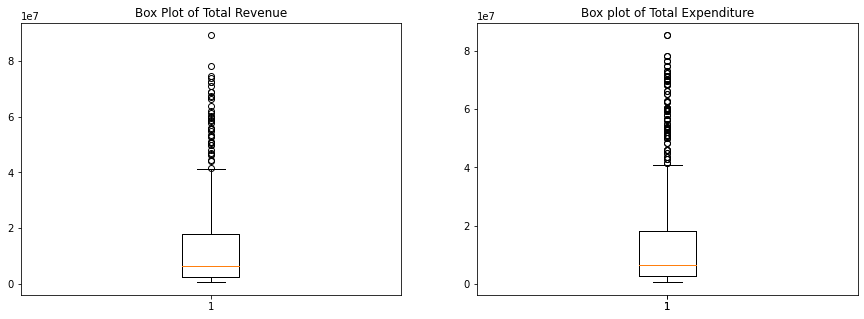

In [ ]:
#boxplots

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(educ2_df["TOTAL_REVENUE"])
plt.title("Box Plot of Total Revenue")

plt.subplot(1,2,2)
plt.boxplot(educ2_df["TOTAL_EXPENDITURE"])
plt.title("Box Plot of Total Expenditure")
plt.boxplot(educ2_df["TOTAL_EXPENDITURE"])
plt.title("Box plot of Total Expenditure")
plt.show()

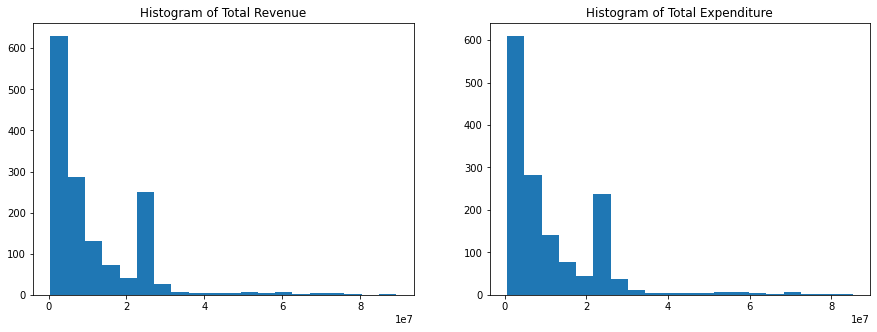

In [ ]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.hist(educ2_df["TOTAL_REVENUE"], bins=20)
plt.title("Histogram of Total Revenue")

plt.subplot(1,2,2)
plt.hist(educ2_df["TOTAL_EXPENDITURE"], bins=20)
plt.title("Histogram of Total Expenditure")

plt.show()

2. If you detect outliers in the `TOTAL_REVENUE` and `TOTAL_EXPENDITURE `variables, apply the techniques you learned in this lesson to eliminate them and validate that there are no outlier values after you handle them.
--
> Using the Winsorization method, we have removed the outliers.





In [ ]:
# Winsorization (Percentile Method)

from scipy.stats.mstats import winsorize

# Apply one-way winsorization to the highest end
# of the value distribution. 
winsorized_revenue = winsorize(educ2_df["TOTAL_REVENUE"], (0, 0.05))
winsorized_expenditure = winsorize(educ2_df["TOTAL_EXPENDITURE"], (0, 0.05))


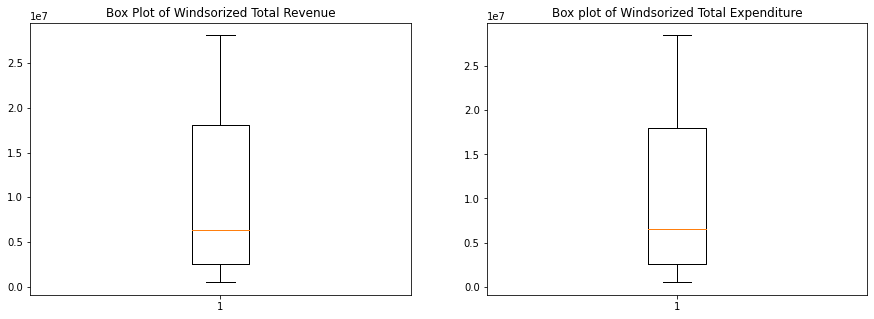

In [ ]:
#winsorized boxplots

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(winsorized_revenue, whis=5)
plt.title("Box Plot of Windsorized Total Revenue")

plt.subplot(1,2,2)
plt.boxplot(winsorized_expenditure, whis=5)
plt.title("Box plot of Windsorized Total Expenditure")
plt.show()

3.  Create another variable by subtracting the original `TOTAL_EXPENDITURE` from `TOTAL_REVENUE` (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique that think is most suitable.
---
> Yes, there are outliers in our new variable, `TOTAL_DEFICIT`, see in the box plot below. Using 2-way Windorization, we removed the outliers.



In [ ]:
educ_df['TOTAL_DEFICIT'] = educ_df['TOTAL_REVENUE'] - educ_df['TOTAL_EXPENDITURE']

In [ ]:
print(round(educ_df['TOTAL_DEFICIT'].describe(),2))

count       1280.00
mean     -104599.01
std       573404.48
min     -5487742.00
25%      -181685.75
50%       -21484.00
75%        51304.25
max      3897129.00
Name: TOTAL_DEFICIT, dtype: float64


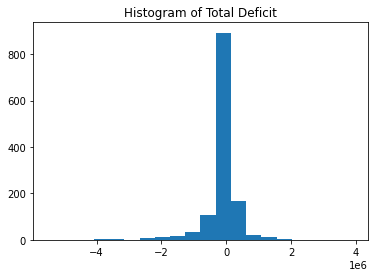

In [ ]:
plt.hist(educ_df['TOTAL_DEFICIT'], bins=20)
plt.title("Histogram of Total Deficit")
plt.show()

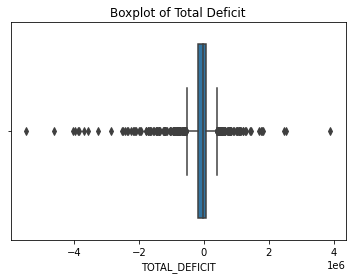

In [ ]:
sns.boxplot(educ_df['TOTAL_DEFICIT'])
plt.title("Boxplot of Total Deficit")
plt.show()

In [ ]:
winsorized_deficit = winsorize(educ_df["TOTAL_DEFICIT"], (0.05, 0.05))

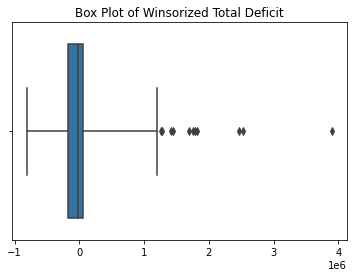

In [ ]:
sns.boxplot(winsorized_deficit, whis=5)
plt.title("Box Plot of Winsorized Total Deficit")
plt.show()

4.  Now create another variable by subtracting `TOTAL_EXPENDITURE` from `TOTAL_REVENUE`. This time, use the outlier eliminated versions of `TOTAL_EXPENDITURE` from `TOTAL_REVENUE`. In this newly created variable, can you find any outliers? If so, eliminate them.


In [ ]:
educ2_df['TOTAL_DEFICIT'] = educ2_df['TOTAL_REVENUE'] - educ2_df['TOTAL_EXPENDITURE']

In [ ]:
print(round(educ2_df['TOTAL_DEFICIT'].describe(),2))

count       1492.00
mean      -32096.22
std       560774.82
min     -5487742.00
25%      -136814.75
50%         -535.50
75%       187628.50
max      3897129.00
Name: TOTAL_DEFICIT, dtype: float64


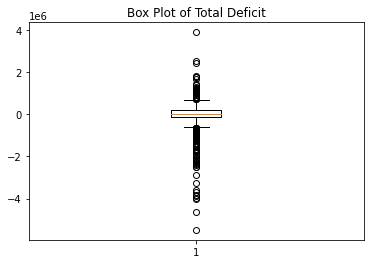

In [ ]:
plt.boxplot(educ2_df["TOTAL_DEFICIT"])
plt.title("Box Plot of Total Deficit")
plt.show()

In [ ]:
winsorized_deficit2 = winsorize(educ2_df["TOTAL_DEFICIT"], (0.1, 0.1))

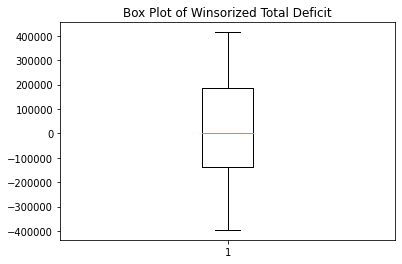

In [ ]:
plt.boxplot(winsorized_deficit2)
plt.title("Box Plot of Winsorized Total Deficit")
plt.show()

5.  Compare some basic descriptive statistics of the budget variables you end up with in the third and the fourth questions. Do you see any differences?
---
>   Yes, there are some differences. The mean is greater for removing outliers before aggregating (`winsorized_deficit2`) and the median is less. However, the boxplots look very similar.

In [ ]:
print(np.quantile(winsorized_deficit, [0,.25,.5,.75,1]))
print(np.quantile(winsorized_deficit2, [0,.25,.5,.75,1]))
print(winsorized_deficit.mean())
print(winsorized_deficit2.mean())

[-395270. -136007.    -473.  190726.  391391.]
[-395270.   -136814.75    -535.5   187628.5   414013.  ]
18146.5408847185
21339.22855227882


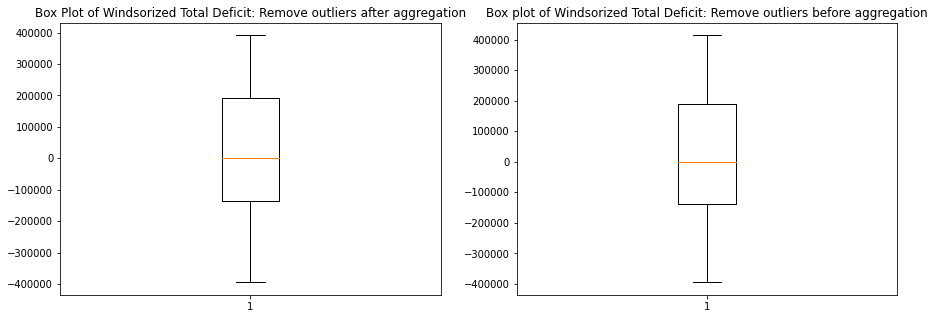

In [ ]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(winsorized_deficit)
plt.title("Box Plot of Windsorized Total Deficit: Remove outliers after aggregation")

plt.subplot(1,2,2)
plt.boxplot(winsorized_deficit2)
plt.title("Box plot of Windsorized Total Deficit: Remove outliers before aggregation")
plt.show()


For almost all critical statistics, the two variables differ substantially. For example:
The mean of the first variant is -61210.33 whereas the mean of the second variant is -173636.
The median of the first variant is -12823.5 whereas the median of the second variant is -14600.5.
The maximum of the first variant is 560511 whereas the maximum of the second variant is 540055.

6.  If your variable of interest is the budget deficit variable, which method do you think is the most appropriate in dealing with the outliers in this variable: the method in the third question or the one in the fourth question?
---
>  It is better in this situation to first calculate the total deficit because this may eliminate some outliers before our outlier removal techniques.  